In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [2]:
vitrina = pd.read_excel(Path.cwd()/'vitrina.xlsx')
vitrina

,Phone_new,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods
0,32565748-000000000,8,2469.625,1.0,19757,8,0,8
1,32565750-575448565151 а,1,26599.000,2.0,26599,2,0,2
2,32565750-575448565151 а5,1,1590.000,1.0,1590,1,0,1
3,43553240-575054413251+75,2,5064.500,1.0,10129,2,0,2
4,55445748-514957495657715,1,27449.000,1.0,27449,1,0,1
...,...,...,...,...,...,...,...,...
88883,57495456-56485151574991,1,1609.000,1.0,1609,1,0,1
88884,57505548-48535350504991,1,999.000,1.0,999,1,0,1
88885,57555656-55575253555698,1,3850.000,1.0,3850,1,0,1
88886,57565352-52575050555092,1,1999.000,1.0,1999,1,591,1


In [4]:
X = vitrina.drop(columns=['Phone_new'])

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score 
scores = []
for k in range(2, 20):
    gmix = GaussianMixture(n_components=k)
    gmix.fit(X)
    labels = gmix.predict(X)
    scores.append([
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    ])

scores_df = pd.DataFrame(scores, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])    

In [7]:
scores_df

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,0.998628,133678.123063,0.000998
1,0.484026,70955.814415,1.387221
2,0.157710,51273.682077,2.503653
3,0.161275,74997.624276,2.047351
4,0.136496,62082.556166,2.345709
5,0.111860,49493.080311,3.738514
6,0.099449,64077.663856,3.192739
7,0.067208,30511.118309,3.159431
8,0.074056,42018.239410,5.000859
9,0.102676,45544.397247,4.034582


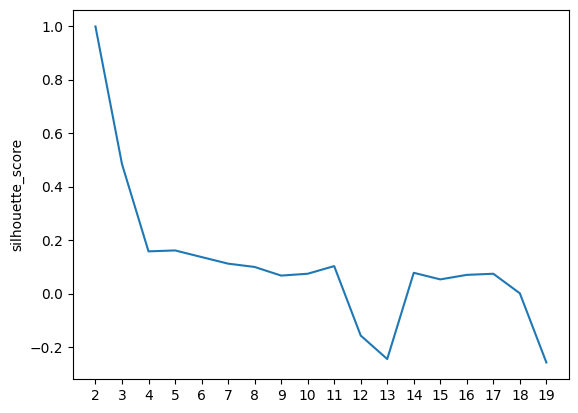

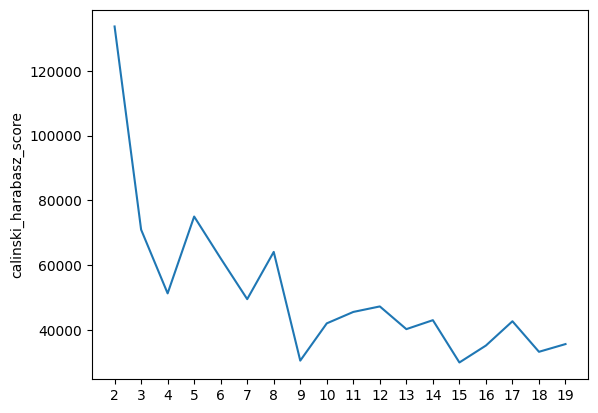

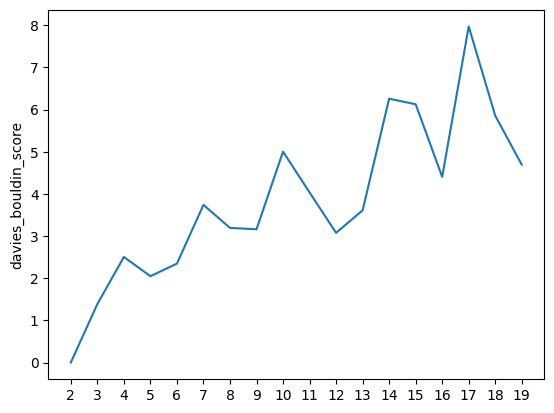

In [8]:
scores_df

for score in scores_df.columns:
    sns.lineplot(x=range(2, 20), y=scores_df[score])
    plt.xticks(range(2, 20))
    plt.show()

In [9]:
normalized_scores=(scores_df-scores_df.mean())/scores_df.std()
normalized_scores

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,3.220119,3.354802,-1.984795
1,1.351927,0.786011,-1.270936
2,0.167278,-0.020071,-0.696009
3,0.180221,0.951543,-0.930990
4,0.090263,0.422607,-0.777345
5,0.000826,-0.092995,-0.060096
6,-0.044228,0.504316,-0.341152
7,-0.161276,-0.870401,-0.358305
8,-0.136415,-0.399127,0.589970
9,-0.032513,-0.254714,0.092369


In [10]:
normalized_scores['sum'] = normalized_scores['silhouette_score'] + normalized_scores['calinski_harabasz_score'] + normalized_scores['davies_bouldin_score']
normalized_scores.index.name = 'n_clusters'
normalized_scores = normalized_scores.reset_index()
normalized_scores['n_clusters'] = normalized_scores['n_clusters'] + 2
normalized_scores

,n_clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score,sum
0,2,3.220119,3.354802,-1.984795,4.590126
1,3,1.351927,0.786011,-1.270936,0.867002
2,4,0.167278,-0.020071,-0.696009,-0.548802
3,5,0.180221,0.951543,-0.930990,0.200774
4,6,0.090263,0.422607,-0.777345,-0.264476
5,7,0.000826,-0.092995,-0.060096,-0.152266
6,8,-0.044228,0.504316,-0.341152,0.118935
7,9,-0.161276,-0.870401,-0.358305,-1.389982
8,10,-0.136415,-0.399127,0.589970,0.054428
9,11,-0.032513,-0.254714,0.092369,-0.194857


In [11]:
normalized_scores[['n_clusters', 'sum']].sort_values(by='sum', ascending=False)

,n_clusters,sum
0,2,4.590126
15,17,1.609578
1,3,0.867002
12,14,0.753837
3,5,0.200774
6,8,0.118935
13,15,0.062206
8,10,0.054428
16,18,-0.131132
5,7,-0.152266


In [12]:
gm = GaussianMixture(n_components=4)

vitrina['cluster']= gm.fit_predict(X)

vitrina

,Phone_new,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,cluster
0,32565748-000000000,8,2469.625,1.0,19757,8,0,8,1
1,32565750-575448565151 а,1,26599.000,2.0,26599,2,0,2,0
2,32565750-575448565151 а5,1,1590.000,1.0,1590,1,0,1,0
3,43553240-575054413251+75,2,5064.500,1.0,10129,2,0,2,3
4,55445748-514957495657715,1,27449.000,1.0,27449,1,0,1,0
...,...,...,...,...,...,...,...,...,...
88883,57495456-56485151574991,1,1609.000,1.0,1609,1,0,1,0
88884,57505548-48535350504991,1,999.000,1.0,999,1,0,1,0
88885,57555656-55575253555698,1,3850.000,1.0,3850,1,0,1,0
88886,57565352-52575050555092,1,1999.000,1.0,1999,1,591,1,0


In [13]:
vitrina.cluster.value_counts().sort_values(ascending=False)

cluster
0    79031
3     6556
1     3300
2        1
Name: count, dtype: int64

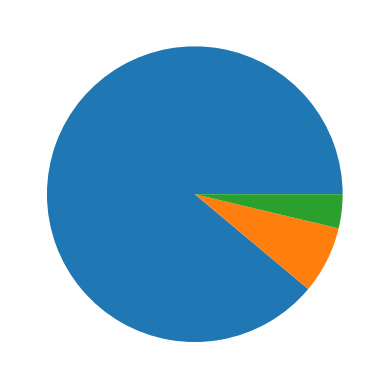

In [14]:
plt.pie(vitrina.cluster.value_counts());

In [16]:
mean_table = vitrina.groupby(by='cluster').mean(numeric_only=True)
mean_table

,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods
cluster,,,,,,,
0,1.000000,8796.099569,1.099999,8.796100e+03,1.099999,133.304944,1.099999
1,3.709394,21808.744217,1.974801,6.141997e+04,6.595152,2148.343636,5.260606
2,984.000000,13183.030488,1.066057,1.297210e+07,1058.000000,255735.000000,1049.000000
3,1.883618,7157.187195,1.098459,1.404576e+04,2.329012,207.394600,2.080537


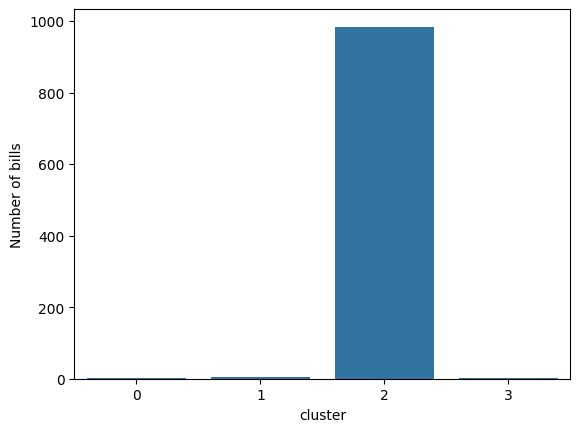

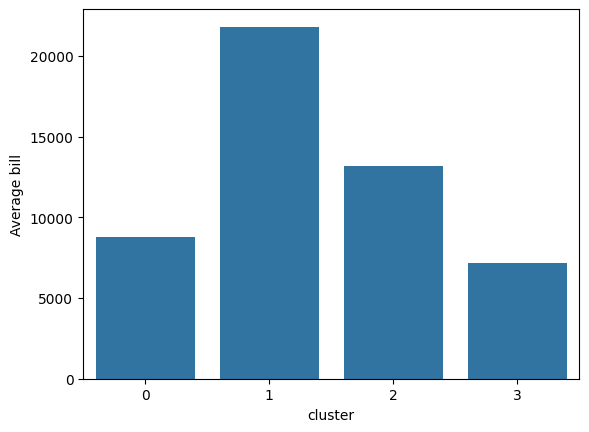

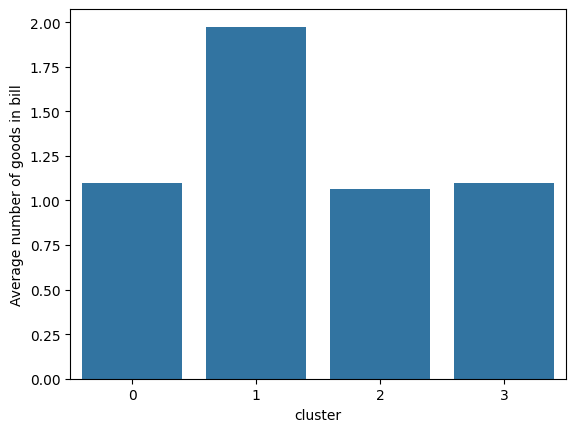

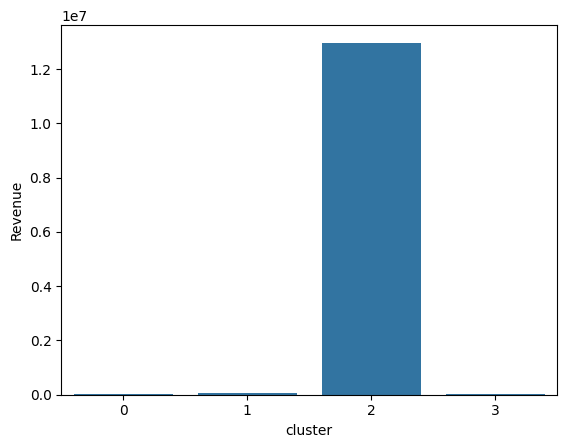

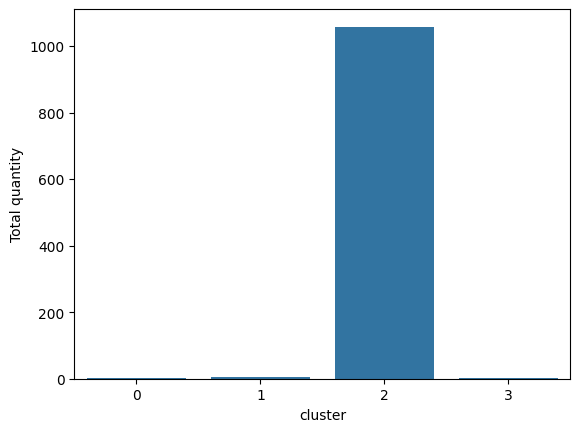

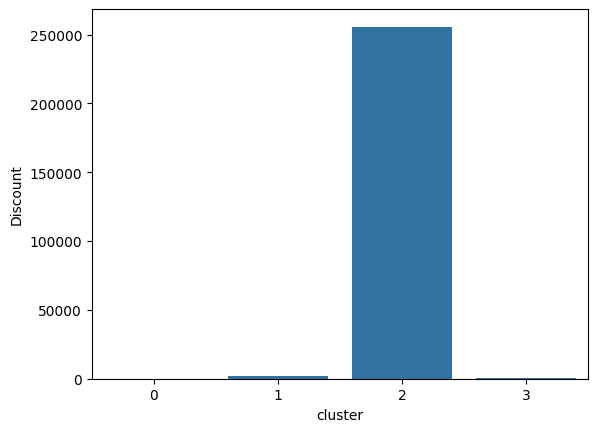

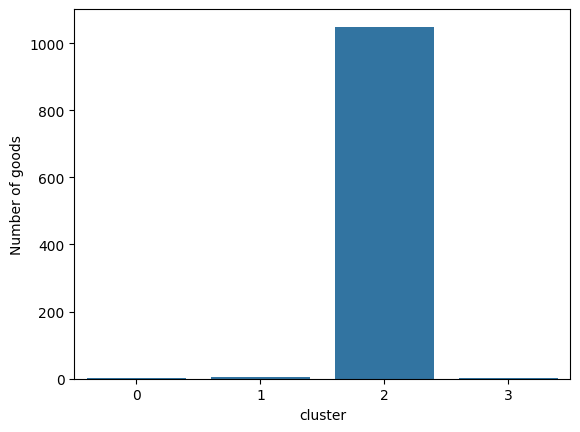

In [17]:
for col in mean_table.columns:
    sns.barplot(x=mean_table.index, y=mean_table[col])
    plt.show();

## CLusters
0. smallest bills, quick purchases of some item in need
1. Huge and frequent spenders, highest amount of bills
2. Consumers who buy a lot and frequently, spend on all types of goods evenly.
3. High infrequent spenders. Usually a 1-2 big high-value purchase.
4. Buy most number of goods on average. Acquire mostly family goods: furniture, elite technology, goods for home, sports & leisure
5. Clients who have children and spend on child goods, sports and leisure, do it yourself goods, etc.
6. 
7. 
8. average Consumers who buy technology
9. Car enthusiasts who buy pretty much only car stuff
10. 
11. One-time accessory affordable spender: low average bill, nearly one item per order

In [18]:
gm = GaussianMixture(n_components=9)

vitrina['cluster']= gm.fit_predict(X)

vitrina

,Phone_new,Number of bills,Average bill,Average number of goods in bill,Revenue,Total quantity,Discount,Number of goods,cluster
0,32565748-000000000,8,2469.625,1.0,19757,8,0,8,2
1,32565750-575448565151 а,1,26599.000,2.0,26599,2,0,2,3
2,32565750-575448565151 а5,1,1590.000,1.0,1590,1,0,1,0
3,43553240-575054413251+75,2,5064.500,1.0,10129,2,0,2,6
4,55445748-514957495657715,1,27449.000,1.0,27449,1,0,1,0
...,...,...,...,...,...,...,...,...,...
88883,57495456-56485151574991,1,1609.000,1.0,1609,1,0,1,0
88884,57505548-48535350504991,1,999.000,1.0,999,1,0,1,0
88885,57555656-55575253555698,1,3850.000,1.0,3850,1,0,1,0
88886,57565352-52575050555092,1,1999.000,1.0,1999,1,591,1,3


In [19]:
vitrina.cluster.value_counts().sort_values(ascending=False)

cluster
0    63763
3    15734
6     5147
7     2312
5      995
2      930
4        5
8        1
1        1
Name: count, dtype: int64

In [20]:
mean_table.columns

Index(['Number of bills', 'Average bill', 'Average number of goods in bill',
       'Revenue', 'Total quantity', 'Discount', 'Number of goods'],
      dtype='object')

In [26]:
#mean_table = vitrina.groupby(by='cluster').mean(numeric_only=True).drop(columns=['TN_Услуги', '%TN_Услуги'])
#mean_table

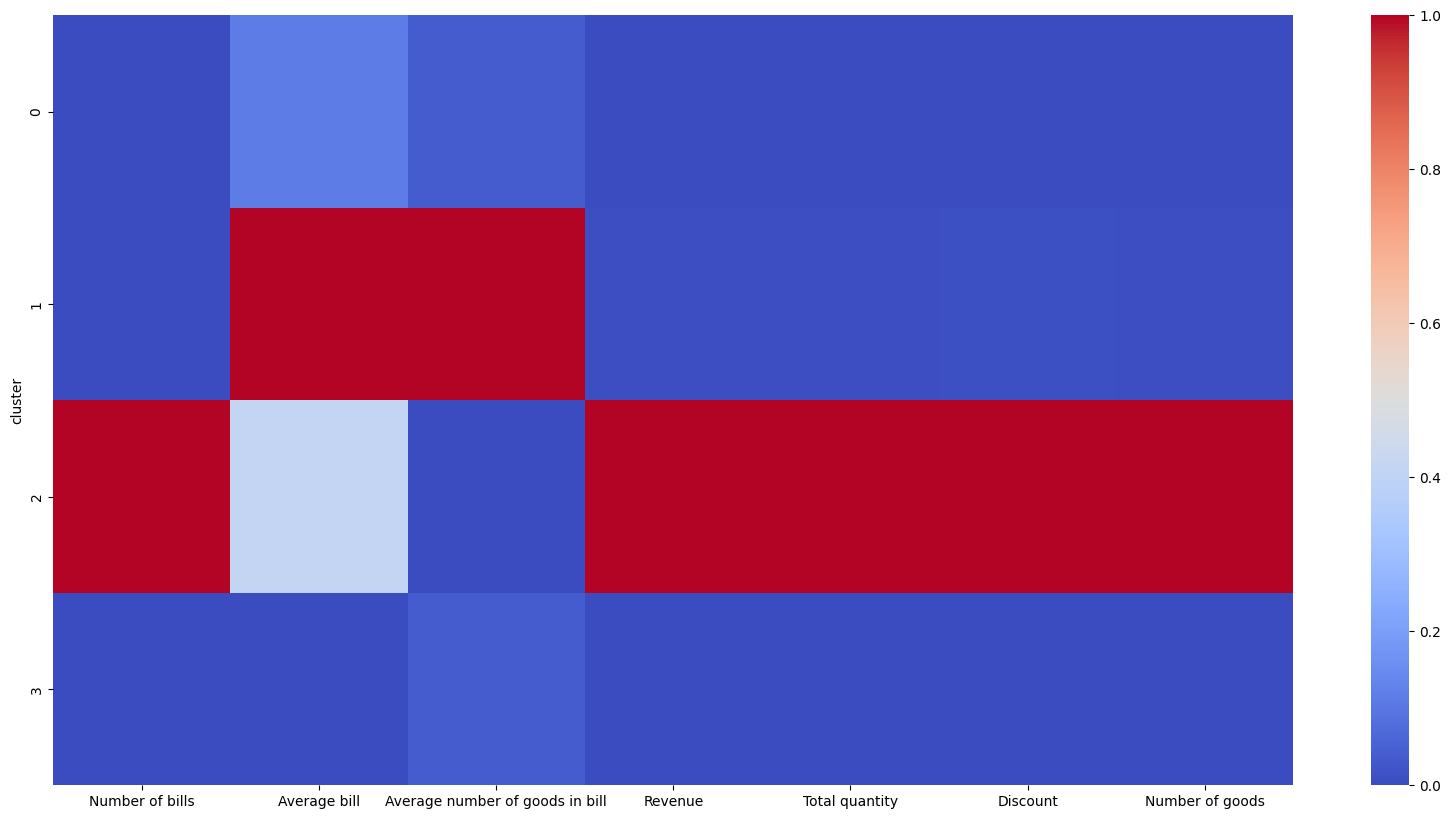

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap((mean_table-mean_table.min())/(mean_table.max()-mean_table.min()), cmap='coolwarm')
plt.show()

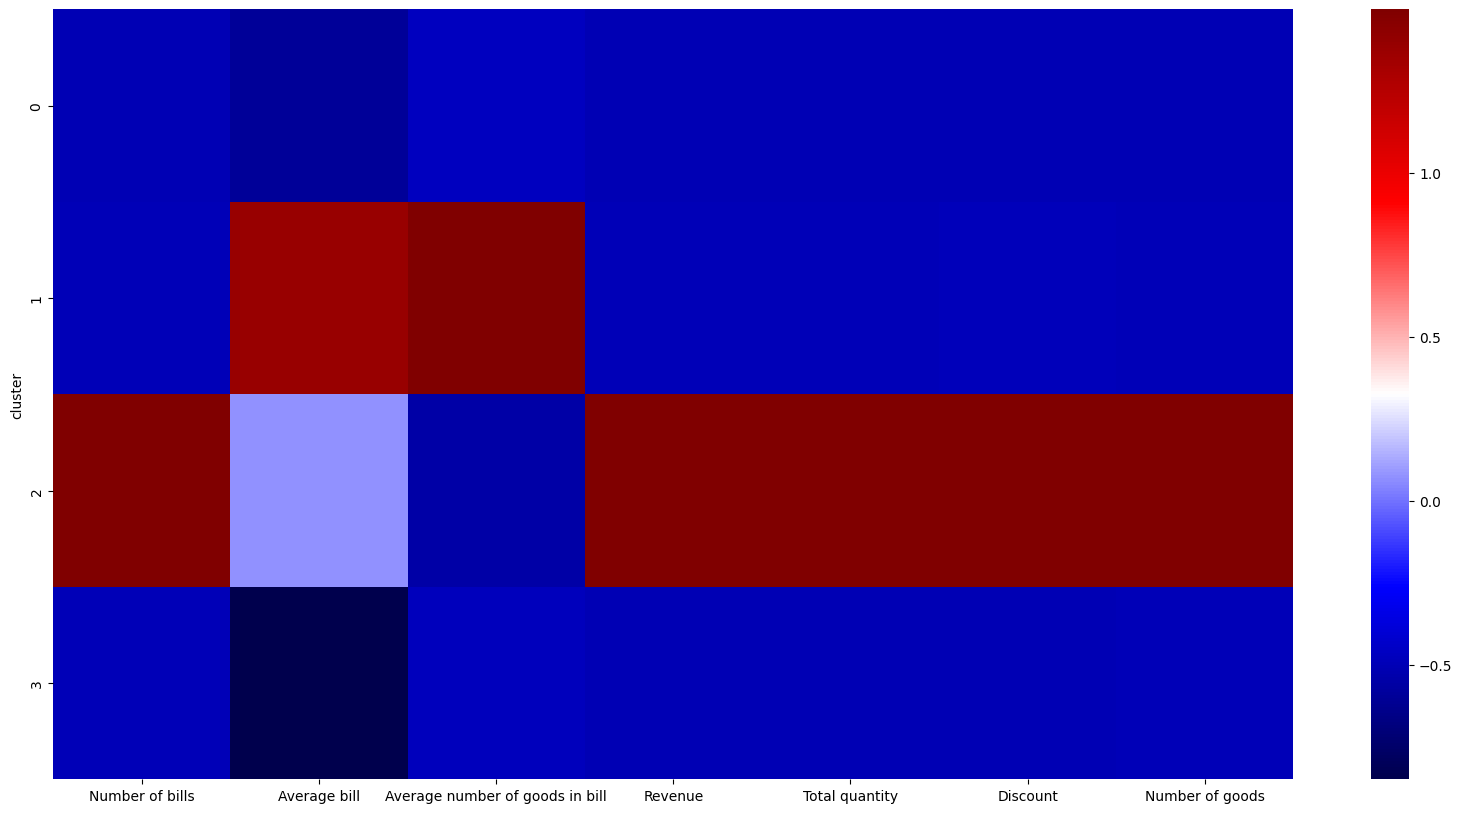

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap((mean_table-mean_table.mean())/mean_table.std(), cmap='seismic')
plt.show()

0. 

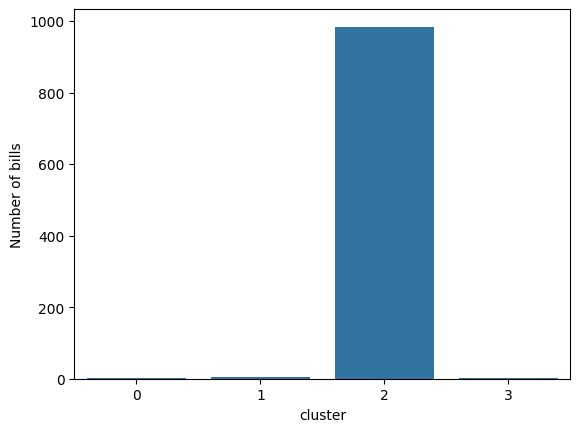

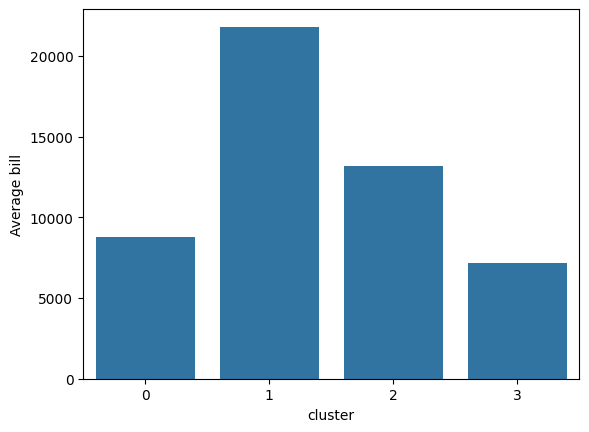

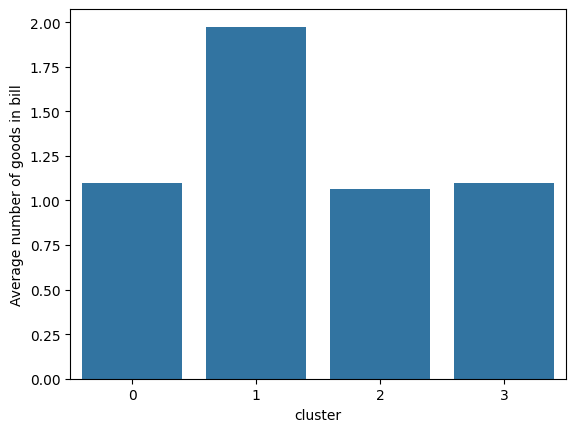

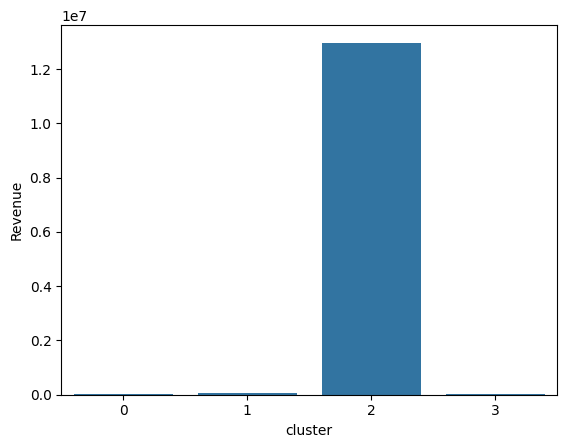

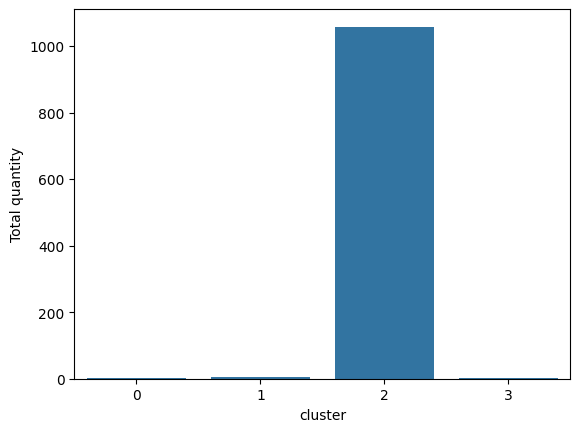

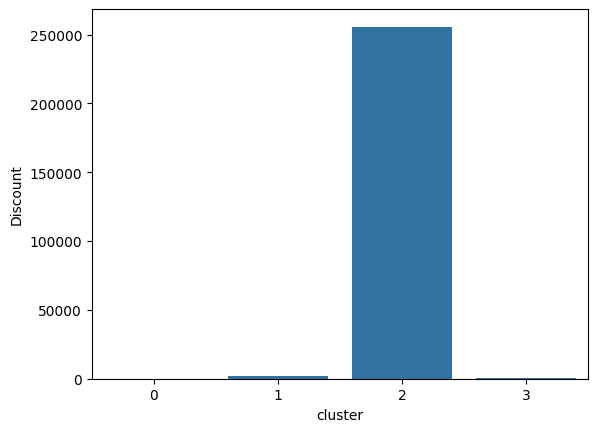

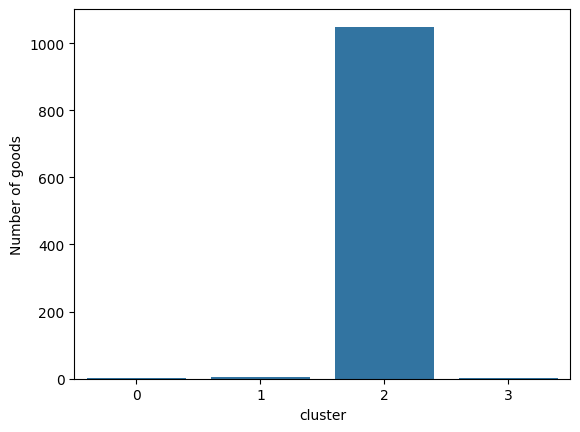

In [25]:
for col in mean_table.columns:
    sns.barplot(x=mean_table.index, y=mean_table[col])
    plt.show();

## CLusters
0. Buys mostly technology, does not buy other or occasionaly
1. Best customer buys a lot spends a lot
2. Buys technology highest average bill
3. High-diversity spenders buys aeverything most avg goods .
4. Buys elite technology furniture, more expensive things
5. Clients who have children and spend on child goods, sports and leisure, also som eon cares
6. 2nd best client
7. Clients with the highest avg bill
8. CLients smallest avg bill quick orders, some random cheap stuff